# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
api_key = "e2f05dd620b92f28373ffd638748466b"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"

data = []

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city
    data.append(requests.get(query_url).json())
    

{'coord': {'lon': -120.46, 'lat': 34.64},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 290.59,
  'pressure': 1016,
  'humidity': 80,
  'temp_min': 287.05,
  'temp_max': 295.15},
 'visibility': 16093,
 'wind': {'speed': 3.42, 'deg': 351.501},
 'clouds': {'all': 1},
 'dt': 1541303880,
 'sys': {'type': 1,
  'id': 410,
  'message': 0.005,
  'country': 'US',
  'sunrise': 1541341522,
  'sunset': 1541379898},
 'id': 5367788,
 'name': 'Lompoc',
 'cod': 200}

In [38]:
data[2]

{'coord': {'lon': -134.97, 'lat': -23.12},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 297.019,
  'pressure': 1033.11,
  'humidity': 95,
  'temp_min': 297.019,
  'temp_max': 297.019,
  'sea_level': 1033.07,
  'grnd_level': 1033.11},
 'wind': {'speed': 8.62, 'deg': 62.0012},
 'clouds': {'all': 36},
 'dt': 1541306733,
 'sys': {'message': 0.0033,
  'country': 'PF',
  'sunrise': 1541340742,
  'sunset': 1541387686},
 'id': 4030556,
 'name': 'Rikitea',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
kelvin = []
wind_speed = []

for i in range(len(cities)):
    try:
        city_name.append(data[i]['name'])
        cloudiness.append(data[i]['clouds']['all'])
        country.append(data[i]['sys']['country'])
        date.append(data[i]['dt'])
        humidity.append(data[i]['main']['humidity'])
        lat.append(data[i]['coord']['lat'])
        lon.append(data[i]['coord']['lon'])
        kelvin.append(data[i]['main']['temp_max'])
        wind_speed.append(data[i]['wind']['speed'])
    except KeyError:
        continue

In [70]:
f = []
for k in kelvin:
    f.append((9/5)*(k-273)+32)

d = {'city':city_name,'cloudiness':cloudiness,'country':country,'date':date,'humidity':humidity,
    'lat':lat,'lon':lon,'max temp':f,'wind speed':wind_speed}
df = pd.DataFrame(data=d)
df.head()

,city,cloudiness,country,date,humidity,lat,lon,max temp,wind speed
0,Lompoc,1,US,1541303880,80,34.64,-120.46,71.8700,3.42
1,Kpandu,12,GH,1541306946,90,7.00,0.29,75.5042,2.17
2,Rikitea,36,PF,1541306733,95,-23.12,-134.97,75.2342,8.62
3,Daru,44,SL,1541306946,94,7.99,-10.85,73.2992,1.62
4,Nazarovo,88,RU,1541306946,79,56.01,90.42,18.4892,6.47


City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5,0,'Latitude')

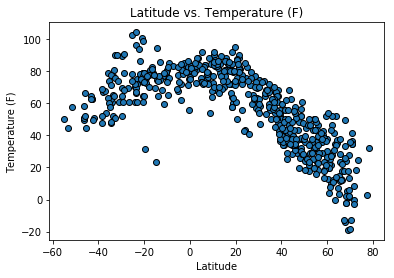

In [83]:
lat_temp_chart = plt.scatter(df['lat'],df['max temp'],edgecolors="black")
plt.title("Latitude vs. Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")

#### Latitude vs. Humidity Plot

Text(0.5,0,'Latitude')

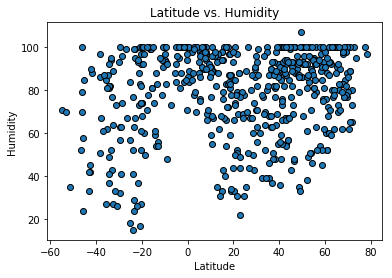

In [84]:
plt.scatter(df['lat'],df['humidity'],edgecolors="black")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

#### Latitude vs. Cloudiness Plot

Text(0.5,0,'Latitude')

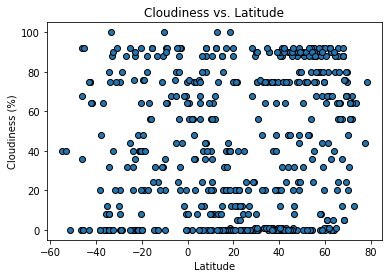

In [86]:
plt.scatter(df['lat'],df['cloudiness'],edgecolors="black")
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#### Latitude vs. Wind Speed Plot

Text(0.5,0,'Latitude')

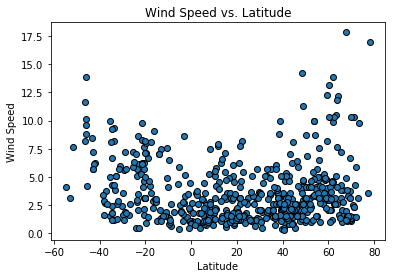

In [87]:
plt.scatter(df['lat'],df['wind speed'],edgecolors="black")
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")